In [1]:
#step-1. bsuniess problem understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#step-2. data understanding

In [4]:
#step2.1 data extraction

In [5]:
df=pd.read_csv("Downloads\\mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [7]:
#Data Understanding

In [8]:
df['Virus Present'].value_counts()

0    200
1    200
Name: Virus Present, dtype: int64

In [9]:
df.columns

Index(['Med_1_mL', 'Med_2_mL', 'Virus Present'], dtype='object')

In [10]:
#step-3 data preprocessing

In [11]:
#step-3.1 Exploratory data analysis

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


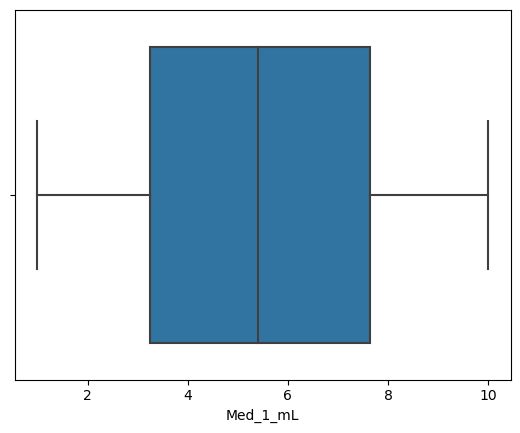

In [13]:
sns.boxplot(df['Med_1_mL'])
plt.show()

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


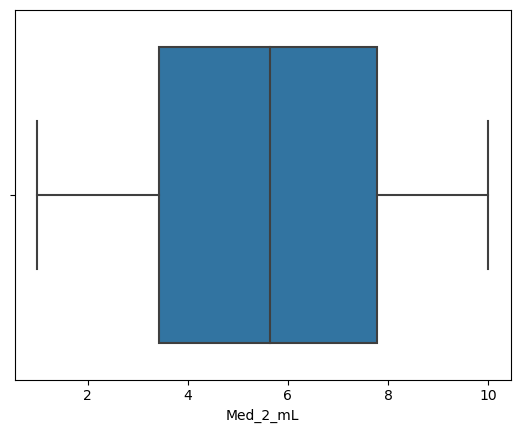

In [14]:
sns.boxplot(df['Med_2_mL'])
plt.show()

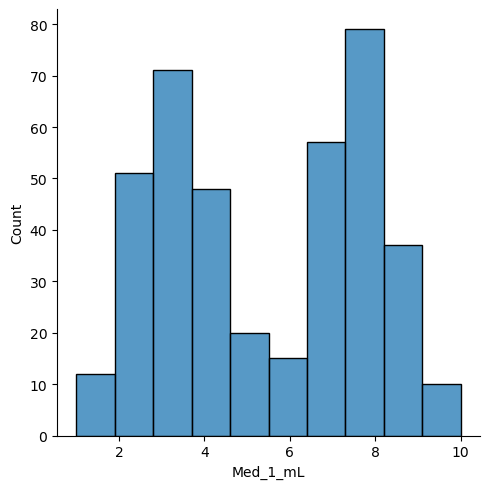

In [15]:
sns.displot(df['Med_1_mL'])
plt.show()

In [16]:
df['Med_1_mL'].skew()

-0.011421973953190495

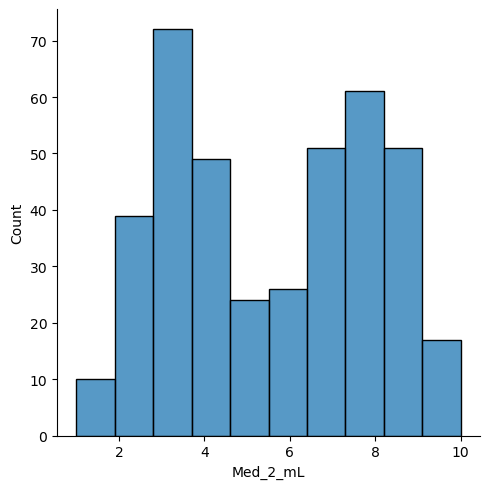

In [18]:
sns.displot(df['Med_2_mL'])
plt.show()

In [19]:
df['Med_2_mL'].skew()

0.004315085455234912

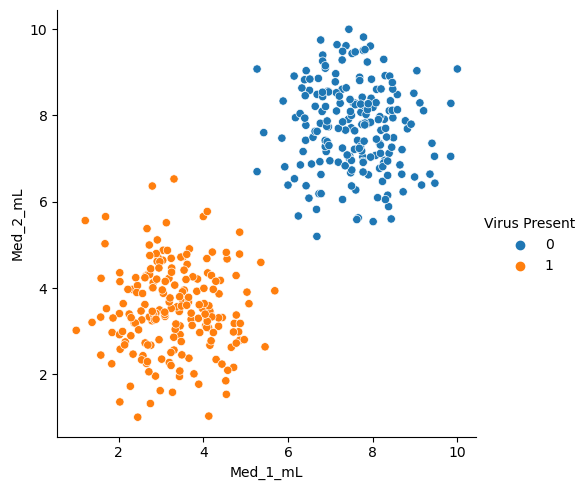

In [20]:
sns.relplot(x='Med_1_mL',y='Med_2_mL',data=df,hue='Virus Present')
plt.show()

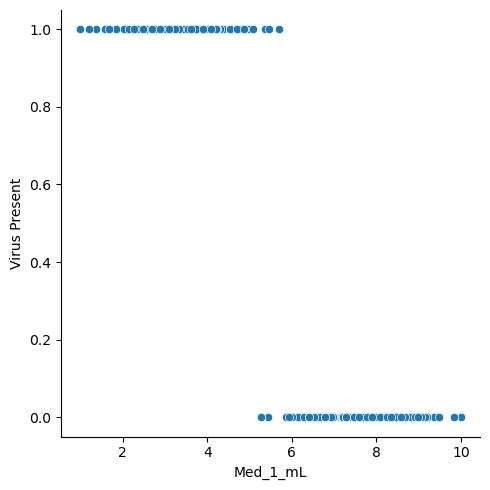

In [21]:
sns.relplot(x='Med_1_mL',y='Virus Present',data=df)
plt.show()

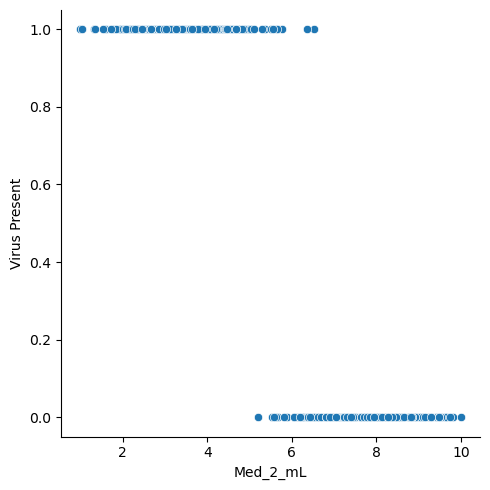

In [22]:
sns.relplot(x='Med_2_mL',y='Virus Present',data=df)
plt.show()

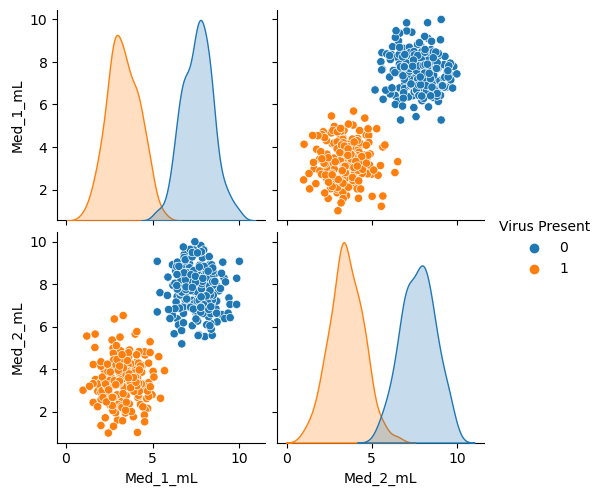

In [23]:
sns.pairplot(df,hue="Virus Present")
plt.show()

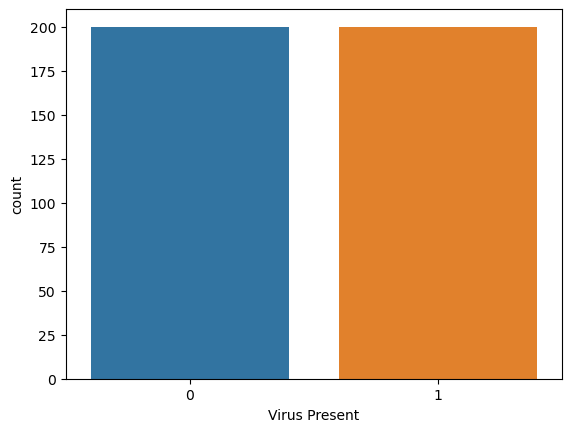

In [27]:
sns.countplot(x=df['Virus Present'])
plt.show()

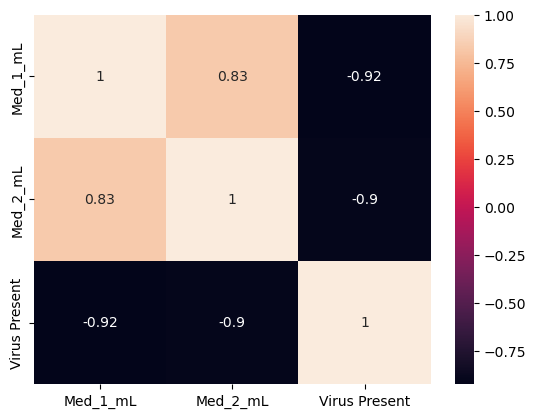

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
x=df.drop(columns=['Virus Present'])
y=df['Virus Present']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [34]:
#step-4 Modeling

In [35]:
from sklearn.svm import SVC

In [36]:
model=SVC()

In [37]:
model.fit(x_train,y_train)

SVC()

In [38]:
#prediction

In [39]:
ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

In [40]:
#step-5 evolution

In [41]:
from sklearn.metrics import accuracy_score
print('accuracy_score of test:',accuracy_score(y_test,ypred_test))
print('accuracy_score of train:',accuracy_score(y_train,ypred_train))

accuracy_score of test: 1.0
accuracy_score of train: 1.0


C:\Users\hi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


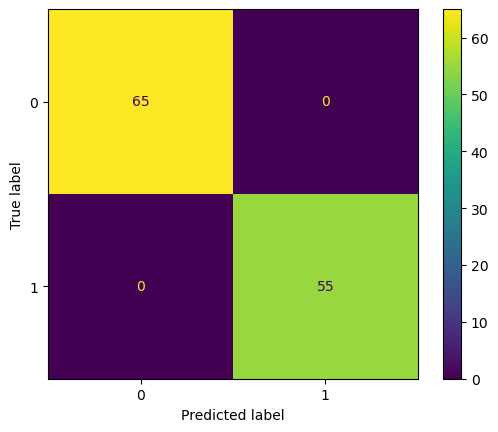

In [42]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,x_test,y_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        55

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [45]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,x,y,cv=5)
print(cv_score)
cv_score.mean()

[1. 1. 1. 1. 1.]


1.0

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
estimator=SVC()
param_grid={'C':[0,0.1,1,10,100,1.5],'kernel':['linear','rbf','sigmoid','poly']}
cv=GridSearchCV(estimator,param_grid,cv=5)

cv.fit(x,y)

C:\Users\hi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\hi\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 189, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 0.1, 1, 10, 100, 1.5],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [50]:
cv.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [52]:
from sklearn.svm import SVC
model=SVC(C=0.1,kernel='linear')
model.fit(x_train,y_train)

ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

from sklearn.metrics import accuracy_score
print('accuracy_score of test:',accuracy_score(y_test,ypred_test))
print('accuracy_score of train:',accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(model,x,y,cv=5)
print(cv_score)
cv_score.mean()

accuracy_score of test: 1.0
accuracy_score of train: 1.0
[1. 1. 1. 1. 1.]


1.0